# Lecture 2: data pre-processing

*cloudy-sfu*

**Outlines**:

- Data profiling
- Type of variables
- Fill missing values
- Encoding
- Zipping
- Correlation
- Cross validation

In [2]:
import pandas as pd
import numpy as np

# Background

They investigate the poverty of households in two differen cities in late 2018. 

Each household is a sample, and the answer to questions on the paper has been recorded in our database. The meaning of the variables are shown as follow.

[Go to type of varibables](#Type-of-variables)

| Name          | Data Type | Description       |
| ------------- | --------- | -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| community     | Nominal   | The place of the household's residence. All the communities are from two province far away, however, communities in each province is adjacent to each other. The first 1000 samples are from one province, and the rest are from the other.          |
| fee_edu       | Scale     | The household's yearly fee of education. Unit: CNY 2018                   |
| fee_food      | Scale     | The household's yearly fee of food. Unit: CNY 2018                        |
| fee_med       | Scale     | The household's yearly fee of medical care. Unit: CNY 2018                |
| fee_ent       | Scale     | The household's yearly fee of entertainment. Unit: CNY 2018               |
| fee_fin       | Scale     | The household's yearly fee to repay the loan. Unit: CNY 2018              |
| members       | Scale     | Number of family members in the household. Unit: CNY 2018                 |
| industry      | Nominal   | The industry that contributes the majority of income to the household.    |
| sq_field      | Scale     | Square of agriculture field the household can use. (In China, land is not privately owned, so it uses the word "use".)  Unit: Mu (About 667 m^2)                                                     |
| sq_pool       | Scale     | Square of fish pool the household can use. Unit: Mu (About 667 m^2)       |
| sq_forest     | Scale     | Square of forest the household can use. Unit: Mu (About 667 m^2)          |
| sq_fruit      | Scale     | Square of orchard the household can use. Unit: Mu (About 667 m^2)         |
| sq_other      | Scale     | Square of other land the household can use. Unit: Mu (About 667 m^2)      |
| water         | Ordinal   | Water source: 1 - from tap  2 - from well  3 - from polluted river. The options are from better to worse.                 |
| dwelling      | Ordinal   | Meterial of the house: 1 - concrete  2 - tile  3 - wood  4 - soil  5 - herb. The options are from better to worse.            |
| power         | Ordinal   | Power source: 1 - firewood  2 - coal  3 - natural gas  4 - electricity. The options are from worse to better.                 |
| sq_house      | Scale     | Square of the house. Unit: m^2                                            |
| traffic       | Ordinal   | Traffic condition in the community: 1 - walking on the mountain road  2 - walking on a smooth road  3 - bicycle  4 - motorcycle  5 - car  6 – truck. The options are from worse to better.           |
| policy1       | Nominal   | Whether supported by the policy.                      |
| policy2       | Nominal   | Whether supported by the policy. |
| policy3       | Nominal   | Whether supported by the policy.        |
| policy4       | Nominal   | Whether supported by the policy. |
| policy5       | Nominal   | Whether supported by the policy.  |
| policy6       | Nominal   | Whether supported by Policy 6, which is an additional policy to help rural farmers in difficulties who have not participated, who are unable to participate in Policy 4, or who cannot afford to pay for themselves after participating in Policy 4. |
| policy_ot     | Nominal   | Whether supported by other similar policy.                                |
| income        | Scale     | Yearly income of the household. Unit: CNY 2018                            |
| poor          | Nominal   | Whether recognized as a poor household which needs financial aid.         |
| financial_aid | Scale     | The amount of financial aid given to the poor household by the government or charities. (Including discount, materials, and allowance.) Unit: CNY 2018                                               |

# Data profiling

In [3]:
dataset = pd.read_excel('data/China Poverty 2018.xlsx', sheet_name='data')

Have a glimpse on the dataset.

In [3]:
dataset.head()

,community,fee_edu,fee_food,fee_med,fee_ent,fee_fin,members,industry,sq_field,sq_pool,...,policy1,policy2,policy3,policy4,policy5,policy6,policy_ot,income,poor,financial_aid
0,ZhongCun,1800.0,10000.0,800.0,0.0,2000.0,5.0,manufacture,2.0,0.0,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,23000.0,0.0,NaN
1,ZhongCun,0.0,8500.0,800.0,0.0,0.0,3.0,manufacture,2.0,0.0,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,18000.0,1.0,2000.0
2,ZhongCun,3450.0,9500.0,800.0,0.0,0.0,4.0,agriculture,0.0,0.0,...,NaN,NaN,NaN,1.0,NaN,NaN,1.0,25000.0,0.0,NaN
3,ZhongCun,11000.0,14500.0,600.0,0.0,0.0,7.0,business,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,38000.0,0.0,NaN
4,ZhongCun,650.0,7500.0,600.0,0.0,0.0,3.0,agriculture,2.0,0.0,...,NaN,NaN,1.0,NaN,NaN,NaN,1.0,17000.0,1.0,2000.0


In [4]:
dataset.describe()

,fee_edu,fee_food,fee_med,fee_ent,fee_fin,members,sq_field,sq_pool,sq_forest,sq_fruit,...,policy1,policy2,policy3,policy4,policy5,policy6,policy_ot,income,poor,financial_aid
count,1395.000000,1550.000000,1410.000000,1176.000000,1096.000000,1589.000000,1544.000000,616.000000,932.000000,657.000000,...,40.0,309.0,828.0,1235.0,73.0,329.0,128.0,1521.000000,1529.000000,670.000000
mean,5626.629391,10451.505161,2679.848936,397.266156,686.963504,4.794840,1.802979,0.206331,2.162843,0.418113,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,34720.325348,0.528450,5524.190164
std,8005.395748,6697.273421,6054.031621,1356.359803,3851.743151,1.914928,2.172315,0.570331,4.698006,1.335967,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27620.904390,0.499353,8399.647881
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.000000,0.000000,0.000000
25%,700.000000,6000.000000,600.000000,0.000000,0.000000,4.000000,0.900000,0.000000,0.000000,0.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,18000.000000,0.000000,2000.000000
50%,3600.000000,9500.000000,1200.000000,0.000000,0.000000,5.000000,1.500000,0.000000,0.150000,0.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,26000.000000,1.000000,3000.000000
75%,7800.000000,13000.000000,2600.000000,200.000000,0.000000,6.000000,2.100000,0.000000,3.000000,0.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,43000.000000,1.000000,6212.000000
max,100000.000000,73000.000000,100000.000000,30000.000000,60000.000000,13.000000,40.500000,4.000000,40.000000,20.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,350000.000000,1.000000,106305.000000


## Visualization

Do we have a more pretty output or more clear visualization?

In [61]:
from pandas_profiling import ProfileReport
profile = ProfileReport(dataset, title='China Poverty 2018', 
                        plot={'dpi': 200, 'image_format': 'png'}, interactions=None)
profile = profile.to_html()
pd.to_pickle(profile, 'results/poverty_report.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

/home/cld/.conda/envs/tf5/lib/python3.9/site-packages/pandas_profiling/model/correlations.py:55: UserWarning: There was an attempt to calculate the cramers correlation, but this failed.
To hide this warning, disable the calculation
(using `df.profile_report(correlations={"cramers": {"calculate": False}})`
If this is problematic for your use case, please report this as an issue:
https://github.com/pandas-profiling/pandas-profiling/issues
(include the error message: 'No data; `observed` has size 0.')
  warnings.warn(


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

How to read the data profiling?

[Documentation](https://pandas-profiling.ydata.ai/docs/master/index.html#getting-started)

- Histogram: find whether there's missing values, whether text or numeric, number of distinct values (distinguish interval variables with nominal/ordinal variables), distribution, remove constants, remove IDs
- Correlation: variable selection
- Missing values: from "count", find the ratio of missing values; from "matrix", find type of missing values (invastigations with short or long form); from "heatmap", find relationship between missing values.

Why "invalid coefficients"?

These variables are constants.

Theory of filling missing values: missing values are independent with other variables or hidden factors. Often not satisfied in real-world problems.

Example: Air conditioner often breaks down on hot weather. Missing of air conditioner data has relationship with temprature.

# Type of variables

1. nominal variable

- Weakest structure
- Idenfied by name
- Cannot compare between each other

For example, "Iris Setosa", "Iris Versicolour", and "Iris Virginica".

Refering to the [table of variables' meaning](#Background), and discuss about which variables are nominal.

2. ordinal variable

- Stronger than nominal variable
- Can compare between each other
- Can either be numeric or text
- Add or minus operations are not defined

For example, Likert scale from 1-star to 5-stars.

3. interval variable and ratio variable

- interval variable can add or minus
- ratio variable can add, minus, and multiple

For example, temparature and humidity.

In data mining, we don't further distinguish interval and ratio variables.

## Recap

Solution of linear regression:

$$
\hat \beta = (X^T X)^{-1} X^T Y
$$

Models can handle only interval variable:

- Variables should be numeric
- What will happen if we change 1-agriculture 2-manufacture to 1-manufacture 2-agriculture? It should not affect the results.
- How to avoid perform calculating on ordinal variables?
- Can linear algebra handle missing values?

## How to solve?

- Encoding nominal and ordinal variables
- Scoring ordinal variables: convert education level to education year. (6-primary 9-secondary 12-middle 16-collage) 
- Filling missing values

# Filling missing values

## Drop

Initial try: drop samples with missing values.

Pros:

- Will not change the distribution of variables
- Only suitable when the dataset is large

Cons:

- Lost information and special cases

We should not drop all missing values, but we can drop the samples where the dependent variable is missing.

In [6]:
dataset.columns

Index(['community', 'fee_edu', 'fee_food', 'fee_med', 'fee_ent', 'fee_fin',
       'members', 'industry', 'sq_field', 'sq_pool', 'sq_forest', 'sq_fruit',
       'sq_other', 'water', 'dwelling', 'power', 'sq_house', 'traffic',
       'policy1', 'policy2', 'policy3', 'policy4', 'policy5', 'policy6',
       'policy_ot', 'income', 'poor', 'financial_aid'],
      dtype='object')

In [4]:
x = dataset[['community', 'fee_edu', 'fee_food', 'fee_med', 'fee_ent', 'fee_fin',
       'members', 'industry', 'sq_field', 'sq_pool', 'sq_forest', 'sq_fruit',
       'sq_other', 'water', 'dwelling', 'power', 'sq_house', 'traffic',
       'policy1', 'policy2', 'policy3', 'policy4', 'policy5', 'policy6',
       'policy_ot', 'income']]
y = dataset[['poor']]

In [8]:
print(f"{x.shape}, {y.shape} before dropping.")

preserved_index = y.dropna().index

x = x.loc[preserved_index, :]
y = y.loc[preserved_index, :]
print(f"{x.shape}, {y.shape} after dropping.")

(1603, 26), (1603, 1) before dropping.
(1529, 26), (1529, 1) after dropping.


## Golden rule of machine learning

Before we can fill missing values, we should separate dataset into training set and testing set.

Why we should separate dataset into training set and testing set?

Overfitting and underfitting problem. For example, students need homework and mock tests before the final exam.

Denote errors in each dataset as $E$.

$$
E_{test} = (E_{test} - E_{train}) + (E_{train} - E_{best}) + E_{best}
$$

The gap between testing set and training set is **variance**, and the gap between training set and noice is **bias**. $E_{best}$ is the noise, which we cannot eliminate with the dataset.

The golden rule of machine learning is the trade-off between variance and bias.

- High bias and high variance: bad model
- High bias and low variance: underfitting model
- Low bias and high variance: overfitting model
- Low bias and low vairance: impossible model

We should find the frontier in the trade-off.

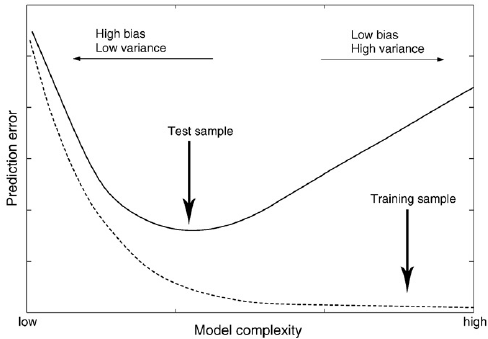

Image from: https://www.researchgate.net/figure/Training-error-and-cross-validation-error-as-a-function-of-model-complexity_fig3_222344717

To give a fair estimation, we should not use the distribution of the testing set in modeling. So, we should split the dataset into the training set and testing set even before the pre-processing.

In [46]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    x, y, train_size=0.8, shuffle=True, random_state=403)

In the following sections, we use the whole dataset for lecture purpose. All the filling is applied to other variables, while `x_train, x_test, y_train, y_test` aren't changed. After we learn everything, we put the steps together as a pipeline and apply to these variables.

## Forward and backward

This method fills each hole with the value before or after it in the same column.

When is this method not suitable to be used?

- The dataset is from an investigation. The order of samples depends on when the question paper is collected. Interviewees should be dependent with each other.
- The first or last sample has missing values.

When can this method be used?

- If the samples are sorted from earlier to later
- If the adjacent samples mean neighbors in real world

In this case, we use "traffic" as an example: the adjacent samples are from the same village, so the road condition should be the same.

In [10]:
traffic = dataset[['traffic']]
print(f"Ratio of missing values: {traffic.isna().mean()}.")
print(f"Missing indices: {np.where(traffic.isna())}")

Ratio of missing values: traffic    0.002495
dtype: float64.
Missing indices: (array([1009, 1353, 1355, 1590]), array([0, 0, 0, 0]))


In [11]:
traffic_nona = traffic.fillna(method='ffill', inplace=False)
print(f"Ratio of missing values: {traffic_nona.isna().mean()}.")
traffic_nona[1008:1011], traffic_nona[1352:1357], traffic_nona[1589:1592]

Ratio of missing values: traffic    0.0
dtype: float64.


(      traffic
 1008      4.0
 1009      4.0
 1010      5.0,
       traffic
 1352      6.0
 1353      6.0
 1354      4.0
 1355      4.0
 1356      3.0,
       traffic
 1589      6.0
 1590      6.0
 1591      6.0)

## Zero

We can fill dummy variables with zeros.

Dummy variables have only zero or one. In this case, if the household is appliable to a particular policy, he checks the question; otherwise, he leaves the question blank. This is the reason for the missing values, however, we cannot distinguish missing values with "no".

In [12]:
policies = dataset[['policy1', 'policy2', 'policy3', 'policy4', 'policy5', 'policy6', 'policy_ot']]
policies_nona = policies.fillna(value=0, inplace=False)
print(f"Ratio of missing values: {policies_nona.isna().mean()}.")

Ratio of missing values: policy1      0.0
policy2      0.0
policy3      0.0
policy4      0.0
policy5      0.0
policy6      0.0
policy_ot    0.0
dtype: float64.


Also, we can fill interval variables with 0 based on the meaning in real world. It's not a general method for interval variable, but the meaning in real world is the more prior than the basic rule.

- If one of the medical fee, entertainment fee, or financial fee is missing, it can be 0.
- If the square of fishing pool, forest, fruit trees or other is missing, it can be 0.

Education fee, food fee, and the square of farming field has the same data type with the variables above, but they cannot be 0, so we fill them with the average.

In [13]:
spcl_fee_sq = dataset[['fee_med', 'fee_ent', 'fee_fin',
                       'sq_pool', 'sq_forest', 'sq_fruit', 'sq_other']]
spcl_fee_sq_nona = spcl_fee_sq.fillna(value=0, inplace=False)
print(f"Ratio of missing values: {spcl_fee_sq_nona.isna().mean()}.")

Ratio of missing values: fee_med      0.0
fee_ent      0.0
fee_fin      0.0
sq_pool      0.0
sq_forest    0.0
sq_fruit     0.0
sq_other     0.0
dtype: float64.


## Scoring

One way to handle ordinal variables is scoring. We know how many years each education level has, so we can convert the education level to education year.

We don't have such column in this case, but we can make one.

In [36]:
education_dict = {'primary': 6, 'secondary': 9, 'middle': 12, 'collage': 16, np.nan: np.nan}

education_level = np.array([['primary'], ['primary'], [np.nan], ['middle'], 
                            ['collage'], ['collage'], ['secondary'], [np.nan], ['middle']])
education = pd.DataFrame(data=education_level, columns=['education'])
education

,education
0,primary
1,primary
2,nan
3,middle
4,collage
5,collage
6,secondary
7,nan
8,middle


Apply the dictionary look-up function.

In [37]:
education['education'].apply(education_dict.get)

0     6.0
1     6.0
2     NaN
3    12.0
4    16.0
5    16.0
6     9.0
7     NaN
8    12.0
Name: education, dtype: float64

Now, we can treat the ordinal variable as the interval variable.

## Mode

In most cases, the gap between different levels cannot be measured, and we cannot convert it to interval variables. There is no methods to handle ordinal variables without bias.

- Sometimes, we treat the ordinal variable directly as the interval variable.
- Also, we can fill ordinal variables with the mode. The "mode" means the most common value.

In this case, we fill both nominal and ordinal variables with their mode.

[Go to encoding](#Encoding)

Particularly, if the dependent variable is ordinal, we can use ordinal logistic regression to make the analysis. Also, we can treat the dependent variable as nominal variable and do classification. 

**Limitation**: filling with mode will significantly change the (multinomial) distribution of the ordinal variables.

In [38]:
from scipy.stats import mode

ordinal = dataset[['industry', 'water', 'dwelling', 'power']]

ordinal_mode = mode(ordinal)
ordinal_mode

ModeResult(mode=array([['agriculture', 2.0, 1.0, 1.0]], dtype=object), count=array([[1088,  812, 1440,  728]]))

In [41]:
ordinal_mode_dict = dict(zip(ordinal.columns, ordinal_mode.mode.flatten()))
ordinal_mode_dict

{'industry': 'agriculture', 'water': 2.0, 'dwelling': 1.0, 'power': 1.0}

In [42]:
ordinal_nona = ordinal.fillna(ordinal_mode_dict, inplace=False)
print(f"Ratio of missing values: {ordinal_nona.isna().mean()}.")

Ratio of missing values: industry    0.0
water       0.0
dwelling    0.0
power       0.0
dtype: float64.


## Average

For interval variables, we usually fill the missing values with its average.

In [19]:
interval = dataset[['fee_edu', 'fee_food', 'members', 'sq_field', 'sq_house', 'income']]
interval_avg = interval.mean(axis=0)
interval_avg

fee_edu      5626.629391
fee_food    10451.505161
members         4.794840
sq_field        1.802979
sq_house      126.446158
income      34720.325348
dtype: float64

In [20]:
interval_avg_dict = dict(zip(interval.columns, interval_avg))
interval_avg_dict

{'fee_edu': 5626.629390681003,
 'fee_food': 10451.505161290323,
 'members': 4.7948395217117685,
 'sq_field': 1.802979274611399,
 'sq_house': 126.4461579296616,
 'income': 34720.325348454964}

In [21]:
interval_nona = interval.fillna(interval_avg_dict, inplace=False)
print(f"Ratio of missing values: {interval_nona.isna().mean()}.")

Ratio of missing values: fee_edu     0.0
fee_food    0.0
members     0.0
sq_field    0.0
sq_house    0.0
income      0.0
dtype: float64.


**Limitation**: How to handle outliers? For example, your village has \\$1,000 salary in average. Elon Mask migrates to your village, and the average salary becomes \\$80,000.

We can remove 5% samples on both side and calculate the average with samples in the middle.

In [80]:
average_dict = {
    col: np.nanmean(np.sort(interval[col])
                    [round(0.025 * interval.shape[0]):round(0.975 * interval.shape[0])])
    for col in interval.columns
}
average_dict

{'fee_edu': 5792.729151291513,
 'fee_food': 10716.692052980132,
 'members': 4.774130006565988,
 'sq_field': 1.8509308510638298,
 'sq_house': 129.85300613496935,
 'income': 35576.90443956786}

Machine learning ethics: Removing outliers will also remove some special cases, so should we remove all the "outliers"?

# Encoding

So far, we haven't handled nominal variables, which are often text. Since we cannot compare different values, keeping different values in the same column has no meaning.

As the solution, we use "encoding" to convert them into dummy variables.

## One-Hot encoding

For example, there are 4 unique values "A", "B", "C", and "D" in the column. We convert

- "A" to $[1, 0, 0, 0]$
- "B" to $[0, 1, 0, 0]$
- "C" to $[0, 0, 1, 0]$
- "D" to $[0, 0, 0, 1]$

Theoriotically, missing values should be mapped to $[0, 0, 0, 0]$. In this case, "community" has no missing values and "industry" [has been filled by its mode](#Mode), so we don't need to consider encoding missing values.

In [23]:
from sklearn.preprocessing import OneHotEncoder

oh = OneHotEncoder()
nominal = dataset[['community', 'industry']]
nominal_1h = oh.fit_transform(nominal)
nominal_1h

<1603x26 sparse matrix of type '<class 'numpy.float64'>'
	with 3206 stored elements in Compressed Sparse Row format>

**Limitation**: the dataset becomes sparse. For example, the community and industry together has 26 unique values. Originally we have 26 independent variables but now we have 50.

[Curse of dimensionality](https://en.wikipedia.org/wiki/Curse_of_dimensionality)

How to solve? We use "target encoding", which maps the unique values to its ratio of appearance.

## Target encoding

For example, we have 60% "students", 30% "workers", and 10% "farmers" in a column. We map

- "students" to 0.6
- "workers" to 0.3
- "farmers" to 0.1

Now, it's numeric and larger value means more common case. Whether the case is common becomes the information to predict the dependent variable.

In [24]:
frequency_dict = dict()
for col in nominal.columns:
    content, frequency = np.unique(nominal.loc[~nominal[col].isna(), col], return_counts=True)
    frequency = frequency / max(nominal.shape[0], 1)
    frequency_dict[col] = dict(zip(content, frequency))
frequency_dict

{'community': {'AoShang': 0.11166562694946974,
  'BaiMa': 0.043668122270742356,
  'BeiLiu': 0.040548970679975045,
  'ChangZhou': 0.006238303181534623,
  'ChengShang': 0.049282595134123516,
  'FangZhou': 0.061759201497192766,
  'HeTang': 0.11291328758577666,
  'LiuHang': 0.0031191515907673115,
  'LiuJing': 0.037429819089207735,
  'MaBu': 0.047411104179663134,
  'PingZheng': 0.0330630068621335,
  'QiaoYin': 0.02994385527136619,
  'ShiWo': 0.11915159076731129,
  'XinWei': 0.03867747972551466,
  'YaLang': 0.021210230817217717,
  'ZhangXi': 0.044915782907049284,
  'ZhangZhou': 0.09107922645040549,
  'ZhongCun': 0.10480349344978165,
  'ZhongLin': 0.0031191515907673115},
 'industry': {'agriculture': 0.678727386150967,
  'business': 0.035558328134747345,
  'government': 0.0018714909544603868,
  'manufacture': 0.16469120399251402,
  'no-work': 0.08234560199625701,
  'student': 0.0031191515907673115}}

In [25]:
nominal_nona = nominal.copy()
for col in nominal.columns:
    nominal_nona[col] = nominal[col].apply(frequency_dict[col].get, convert_dtype='float32')
nominal_nona

,community,industry
0,0.104803,0.164691
1,0.104803,0.164691
2,0.104803,0.678727
3,0.104803,0.035558
4,0.104803,0.678727
...,...,...
1598,0.043668,0.164691
1599,0.043668,0.003119
1600,0.043668,0.678727
1601,0.043668,0.164691


# Pipeline

Put everything together. `sklearn` provides a tool, `TransformerMixin`, which can help us wrap up pre-processing steps.

We mainly use three functions:

- `__init__` defines the parameters we used in the step.
- `fit` defines the parameters related to the distribution of the training set.
- `transform` defines how to apply these parameters to any dataset and perform the pre-processing.

The tool automatically generate the `fit_transform` function, where it runs `fit` and `transform` in a sequence.

We should apply `fit_transform` on the training set and only `transform` on the testing set.


In [26]:
from sklearn.base import TransformerMixin


class TargetEncoder(TransformerMixin):
    def __init__(self, cols=None):
        self.cols = cols
        self.frequency_dict = dict()

    def fit(self, x, *args, **kwargs):
        for col in self.cols:
            content, frequency = np.unique(x.loc[~x[col].isna(), col], return_counts=True)
            frequency = frequency / max(x.shape[0], 1)
            self.frequency_dict[col] = dict(zip(content, frequency))
        return self

    def transform(self, x, *args, **kwargs):
        x_ = x.copy()
        for col in self.cols:
            x_[col] = x_[col].apply(lambda val: self.frequency_dict[col].get(val), convert_dtype='float32')
        return x_

    
class FillingMode(TransformerMixin):
    def __init__(self, cols=None):
        self.cols = cols
        self.mode_dict = dict()
    
    def fit(self, x, *args, **kwargs):
        x_mode = mode(x, axis=0)
        self.mode_dict = dict(zip(x.columns, x_mode.mode.flatten()))
        return self
    
    def transform(self, x, *args, **kwargs):
        x_ = x.copy()
        x_[self.cols] = x[self.cols].fillna(self.mode_dict)
        return x_

class FillingAverage(TransformerMixin):
    def __init__(self, cols):
        self.cols = cols
        self.average_dict = {}

    def fit(self, x, *args, **kwargs):
        average_all = np.nanmean(x[self.cols], axis=0)
        self.average_dict = dict(zip(self.cols, average_all))
        return self

    def transform(self, x, *args, **kwargs):
        x_ = x.copy()
        x_[self.cols] = x[self.cols].fillna(self.average_dict)
        return x_

class FillingForward(TransformerMixin):
    def __init__(self, cols):
        self.cols = cols
    
    def fit(self, x, *args, **kwargs):
        return self
    
    def transform(self, x, *args, **kwargs):
        x_ = x.copy()
        x_[self.cols] = x[self.cols].fillna(method='ffill')
        return x_


class FillingAverageWithoutExtreme(FillingAverage):
    def __init__(self, cols, lower_pct=.05, upper_pct=.95):
        super(FillingAverageWithoutExtreme, self).__init__(cols)
        self.lower_pct = lower_pct
        self.upper_pct = upper_pct

    def fit(self, x, *args, **kwargs):
        n = x.shape[0]
        self.average_dict = {
            col: np.nanmean(np.sort(x[col])[round(self.lower_pct * n):round(self.upper_pct * n)])
            for col in self.cols
        }
        return self

    
class FillingZero(TransformerMixin):
    def __init__(self, cols, zero=0):
        self.cols = cols
        self.zero = zero

    def fit(self, x, *args, **kwargs): return self

    def transform(self, x, *args, **kwargs):
        x_ = x.copy()
        x_[self.cols] = x[self.cols].fillna(self.zero)
        return x_

Define the routine.

In [27]:
from sklearn.pipeline import Pipeline

x_transformer = Pipeline([
    ('fill_forward', FillingForward(cols=['traffic'])),
    ('fill_0', FillingZero(cols=['policy1', 'policy2', 'policy3', 'policy4', 'policy5', 'policy6', 
                                 'policy_ot', 'fee_med', 'fee_ent', 'fee_fin', 'sq_pool', 
                                 'sq_forest', 'sq_fruit', 'sq_other'])),
    ('fill_mode', FillingMode(cols=['industry', 'water', 'dwelling', 'power'])),
    ('fill_avg', FillingAverageWithoutExtreme(cols=['fee_edu', 'fee_food', 'members', 
                                                    'sq_field', 'sq_house', 'income'])),
    ('encoding', TargetEncoder(cols=['community', 'industry']))
])

Apply the routine on the training set and observe the result.

In [28]:
x_train_clean = x_transformer.fit_transform(x_train)

Generate the profile for the clean training set.

In [29]:
profile = ProfileReport(x_train_clean, title='China Poverty 2018 - Clean training', 
                        plot={'dpi': 200, 'image_format': 'png'}, interactions=None)
profile = profile.to_html()
pd.to_pickle(profile, 'results/poverty_clean_training_report.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

**One more step**: the scale or range of the dataset is vary. We should do standardization or zipping before modeling.

# Standardization and zipping

Standardization assumes independent variables are Gaussian distributed. It applies a linear transformation for each column:

$$
x' = \frac{x - \bar x}{\sigma_x}
$$

Zipping assumes independent variables are uniformly distributed from 0 to 1. It applies a linear transformation for each column:

$$
x' = \frac{x - \min x}{\max x - \min x}
$$

We add the zipping to the pipeline. 

**Causion**: Using standardization or zipping will make the dataset loses its column name.

In [30]:
from sklearn.preprocessing import StandardScaler

x_transformer = Pipeline([
    ('fill_forward', FillingForward(cols=['traffic'])),
    ('fill_0', FillingZero(cols=['policy1', 'policy2', 'policy3', 'policy4', 'policy5', 'policy6', 
                                 'policy_ot', 'fee_med', 'fee_ent', 'fee_fin', 'sq_pool', 
                                 'sq_forest', 'sq_fruit', 'sq_other'])),
    ('fill_mode', FillingMode(cols=['industry', 'water', 'dwelling', 'power'])),
    ('fill_avg', FillingAverageWithoutExtreme(cols=['fee_edu', 'fee_food', 'members', 
                                                    'sq_field', 'sq_house', 'income'])),
    ('encoding', TargetEncoder(cols=['community', 'industry'])),
    ('standardization', StandardScaler()),
])
x_train_std = x_transformer.fit_transform(x_train)
x_test_std = x_transformer.transform(x_test)

The mean of training set should always be 0, and the standard deviation should always be 1.

In [31]:
np.mean(x_train_std, axis=0)

array([ 1.36531106e-16, -3.34065473e-17, -1.74295029e-16, -2.32393372e-17,
       -5.80983431e-18, -7.26229288e-18,  2.78872047e-16, -8.85999732e-17,
        7.55278460e-17, -8.71475146e-18,  8.13376803e-17,  2.32393372e-17,
        1.74295029e-17,  9.29573489e-17,  2.67252378e-16, -3.48590058e-17,
        1.51055692e-16, -1.13291769e-16, -5.37409673e-17,  2.90491715e-17,
        6.17294895e-17, -1.01672100e-16,  4.93835916e-17,  1.45245858e-18,
       -6.68130945e-17, -1.26363896e-16])

In [32]:
np.std(x_train_std, axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1.])

However, the distribution of the validation set is slightly different.

In [33]:
np.mean(x_test_std, axis=0)

array([-0.01247546,  0.07805951,  0.04383411,  0.11305446, -0.02040489,
       -0.02362854,  0.03877064,  0.0783948 ,  0.08804301, -0.00258019,
        0.0973117 , -0.07849547, -0.05583531,  0.08848899, -0.06828333,
       -0.0230707 ,  0.11386235,  0.02996159, -0.07364137, -0.07297573,
        0.02368362, -0.02745136, -0.03144736, -0.06016504, -0.05251994,
        0.05129009])

In [34]:
np.std(x_test_std, axis=0)

array([1.02098338, 1.08506076, 1.09423822, 1.43042082, 0.70420898,
       0.59951517, 1.02489207, 0.95940371, 1.27319808, 0.91996793,
       1.35660244, 0.54945757, 0.07422967, 1.01623907, 0.78425009,
       0.99655483, 1.18556774, 0.93366275, 0.76038062, 0.93842077,
       0.99841887, 1.01857124, 0.92862394, 0.95528405, 0.91811276,
       1.00390863])

Until now, the outputed dataset can be used for modeling.

# Correlation

Usually, we use Pearson correlation to represent the relationship between variables.

It ranges from -1 to 1.

- Close to 1 means two variables are positively correlated
- Close to 0 means two variables have no correlation
- Close to -1 means two variables are negatively correlated

**Probability theory**: What is the relationship between "independent" and "no correlation"?

We should not use highly correlated variables because of multicolinearity.

## Multicolinearity

An example of the harm of multicolinearity.

In [35]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression

x1, y1 = make_regression(n_features=2, n_samples=100, noise=20, random_state=403)
lr = LinearRegression()
lr.fit(x1, y1)
lr.coef_

array([33.89571528, 35.49260505])

Add a correlated new feature, and the coefficients change a lot. It will do harm to the interpretation of the model and increase the sensitivity to noise.

In [36]:
rng = np.random.default_rng(seed=403)
new_feature = x1[:, 1] * 0.9 + rng.normal(x1.shape[0]) * 5
x2 = np.hstack([x1, new_feature[:, np.newaxis]])
lr.fit(x2, y1)
lr.coef_

array([ 3.39887266e+01, -4.92505997e+13,  5.47228885e+13])

## VIF

We can use Variance Inflation Factor (VIF) to measure the amount of multicollinearity in a set of multiple regression variables.

$$
V = \mathrm{diag}(C^{-1})
$$
where $C$ is the correlation matrix.

In [37]:
# Remove duplicate rows
v1 = np.vstack(list(set(tuple(row) for row in x_train_std)))
# Calculate VIF
vif = np.linalg.inv(np.corrcoef(v1)).diagonal()
dict(zip(x.columns, vif))

{'community': 1377323898366518.5,
 'fee_edu': -1540336977621785.0,
 'fee_food': 5729226118696907.0,
 'fee_med': 3615631660563426.5,
 'fee_ent': 1512605483032545.2,
 'fee_fin': 3164251838752740.0,
 'members': 2372051309782370.0,
 'industry': -906550977976954.9,
 'sq_field': -4421816436573456.0,
 'sq_pool': -316206226445347.94,
 'sq_forest': -1037998308748150.4,
 'sq_fruit': -1031495106938329.1,
 'sq_other': -3527835204541130.5,
 'water': 1279373359477315.2,
 'dwelling': 5424728438582815.0,
 'power': 223855763816941.16,
 'sq_house': 69378791046801.91,
 'traffic': 9370561611980388.0,
 'policy1': -421849178776476.2,
 'policy2': 103829911099841.06,
 'policy3': 1045313141578619.4,
 'policy4': 94994331179362.38,
 'policy5': 422876775202434.4,
 'policy6': 697084280941660.4,
 'policy_ot': 1701452019973.865,
 'income': -116389297422629.67}

Empirically, VIF > 10 means the variable has multicolinearity.

The result shows the data quality in this dataset is low.

# Cross validation

We sometimes need to tune hyper-parameters, but only the training and testing set are not enough.

## Optimization bias

Example: You guess 10 questions in a exam, each of which has 4 choices.

- How many scores are you expected to get?
- If you take 10 exams, and preserve the best score. How many scores are you expected to get?
- If you take 1000 exams, and preserve the best score. How many scores are you expected to get?
- If you take 1 billion exams, and preserve the best score. How many scores are you expected to get?

When you repeat testing your model with different hyper-parameters, you are driven into a similar problem.

We use cross validation to split the training set into 5 folds, 4 of which are training set and the remained 1 is validation set.

## 5-fold

We should always wrap up 5-fold cross validation with both the data pre-processing and the classification.

In [ ]:
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.tree import DecisionTreeClassifier

k_fold = KFold(n_splits=5, shuffle=True, random_state=403)

parameters = {'classifier__max_depth': (2, 20)}
x_transformer = Pipeline([
    ('fill_forward', FillingForward(cols=['traffic'])),
    ('fill_0', FillingZero(cols=['policy1', 'policy2', 'policy3', 'policy4', 'policy5', 'policy6', 
                                 'policy_ot', 'fee_med', 'fee_ent', 'fee_fin', 'sq_pool', 
                                 'sq_forest', 'sq_fruit', 'sq_other'])),
    ('fill_mode', FillingMode(cols=['industry', 'water', 'dwelling', 'power'])),
    ('fill_avg', FillingAverageWithoutExtreme(cols=['fee_edu', 'fee_food', 'members', 
                                                    'sq_field', 'sq_house', 'income'])),
    ('encoding', TargetEncoder(cols=['community', 'industry'])),
    ('standardization', StandardScaler()),
    ('classifier', DecisionTreeClassifier())
])
mdl = GridSearchCV(x_transformer, parameters, cv=k_fold)
mdl.fit(x_train, y_train)

/home/cld/.conda/envs/tf5/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/cld/.conda/envs/tf5/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/cld/.conda/envs/tf5/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 429, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/home/cld/.conda/envs/tf5/lib/python3.9/site-packages/sklearn/pipeline.py", line 699, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
  File "/home/cld/.conda/envs/tf5/lib/python3.9/site-packages/sklearn/base.py", line 666, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/home/cld/.conda/envs/tf5/lib/python3.9/site-packages/sklearn/tree/

GridSearchCV(cv=KFold(n_splits=5, random_state=403, shuffle=True),
             estimator=Pipeline(steps=[('fill_forward',
                                        <__main__.FillingForward object at 0x7f659c5b3460>),
                                       ('fill_0',
                                        <__main__.FillingZero object at 0x7f659c5b3cd0>),
                                       ('fill_mode',
                                        <__main__.FillingMode object at 0x7f659c5b31f0>),
                                       ('fill_avg',
                                        <__main__.FillingAverageWithoutExtreme object at 0x7f659c5b3fa0>),
                                       ('encoding',
                                        <__main__.TargetEncoder object at 0x7f659c5b3940>),
                                       ('standardization', StandardScaler()),
                                       ('classifier',
                                        DecisionTreeClassifier())]),
             param_grid={'classifier__max_depth': (2, 20)})

In [ ]:
from sklearn.metrics import accuracy_score

y_test_hat = mdl.predict(x_test)
accuracy_score(y_test, y_test_hat)

0.6895424836601307